# Hierarchial Agglomerative Clustering

Clustering is concerned with grouping objects with similar *attributes* or *characteristics*. The objects in the same cluster are closer to one another than the objects from other clusters.

<img src="./HAC_1.jpeg" style="width:250px;height:250px"/>

In the image above, the clusters with the same colour share similar properties (feature values represented on axis). For instance, if the x-axis represents weight and y-axis represents height, then the red cluster represents people with low BMI. Similar interpretations can be drawn for the remaining clusters.

# Algorithm

- Heirarchial Clustering starts by considering each data as a cluster and then combines closest clusters to form larger clusters. This is a bottom up approach.
- There is an alternative approach, which is a top down approach, where the entire data is considered as a single cluster, which is then further divided to form smaller cluster in each step.

The merging and splitting decisions are influenced by certain conditions that are explained below.

# Metrics

Certain metrics are used for calculating the similarility between clusters. Note that a metric is a generalization of the concept of distance. The metrics follow certain properties like:
- non-negativity
- symetricity
- triangle inequality

Some popular metrics are:

1. **Euclidean**
>$d(x^{(i)}, x^{(j)}) = \sqrt{\sum_{l = 1}^{m} (x^{(i)}_l - x^{(j)}_l)^2}$

2. **Manhattan**
>$d(x^{(i)}, x^{(j)}) = \sum_{l = 1}^{m} |x^{(i)}_l - x^{(j)}_l|$

3. **Cosine Distance**
>$d(x^{(i)}, x^{(j)}) = 1 - \frac{x^{(i)} \cdot x^{(j)}}{\|x^{(i)}\| \|x^{(j)}\|}$

# Linkage

Linkage is a strategy for aggregating clusters.

There are $4$ linkages that we encounter:
- Single linkage : The **Single linkage** criterion merges clusters based on the shortest distance over all possible pairs.
- Complete linkage : The **Complete linkage** merges clusters to minimize the maximum distance between the clusters (in ther words, the distance of the furthest elements).
- Average linkage : The **Average linkage** criterion uses average distance over all possibe pairs between the groups for merging clusters.
- Ward's linkage : This computes the sum of squared distances within the clusters.

# HAC Algorithm

1. Calculate the distance matrix between the pairs of clusters.
2. While all the objects are not clustered into one:
    - Detect the two closest group (clusters) and merge them into one (based on any of the Linkage criterion).

# Dendogram

Dendograms are graphical representation of the Agglomerative process which show how the aggregation happens at each level. Let's take example using a toy dataset to understand this.

## Using a toy-dataset to demonstrate HAC

Example:

| $x_1$ | $x_2$ |
| ----- | ----- |
| 8     | 3     |
| 5     | 3     |
| 6     | 4     |
| 1     | 6     |
| 2     | 8     |

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.preprocessing import normalize

In [3]:
X = np.array([
    (8,3),
    (5,3),
    (6,4),
    (1,6),
    (2,8)
])

In [4]:
X_scaled = normalize(X)

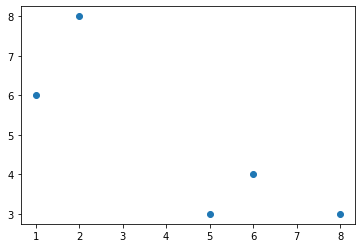

In [5]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

Let's plot the dendogram with `scipy.cluster.hierarchy` library.

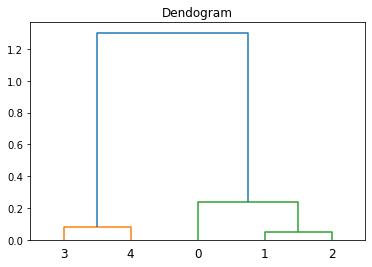

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure()
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

HAC is implemented in `sklearn.cluster` module as `AgglomerativeClustering` class.

In [ ]:
%%time